## Libraries

In [1]:
from google.colab import drive
import os

drive.mount('/content/gdrive', force_remount=True)

os.chdir('/content/gdrive/MyDrive/Colab Notebooks/Grupo 3') # change this with your personal folder

Mounted at /content/gdrive


In [ ]:
from celebamini import CelebAMini
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim

import torchvision
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader
from sklearn.metrics import roc_curve,auc
import time
import os
from tqdm import tqdm
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt


## Datasets

In [ ]:
batch_size = 32
num_workers = 2
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") # device object

In [ ]:
train_dataset = CelebAMini(os.getcwd(), transform=transforms.ToTensor(),type_set='train')
val_dataset = CelebAMini(os.getcwd(), transform=transforms.ToTensor(),type_set='val')
test_dataset = CelebAMini(os.getcwd(), transform=transforms.ToTensor(),type_set='test')
len(train_dataset), len(val_dataset), len(test_dataset)

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=num_workers)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=num_workers)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=num_workers)

## Gender classification

In [ ]:
## Building model
model = models.resnet18(weights = models.ResNet18_Weights.DEFAULT)
num_features = model.fc.in_features
model.fc = nn.Linear(num_features, 2) # binary classification (num_of_class == 2)
model = model.to(device)


In [ ]:
num_epochs = 10
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)
# Lists to store losses and accuracies for each epoch
train_losses = []
val_losses = []
train_accs = []
val_accs = []


### Training

In [ ]:
start_time = time.time()

for epoch in range(num_epochs):
    """ Training Phase """
    model.train()

    running_loss = 0.
    running_corrects = 0

    # load a batch data of images
    for input, (label, _) in tqdm(train_dataloader):
        input, label  = input.to(device), label.to(device)

        # forward inputs and get output
        optimizer.zero_grad()
        outputs = model(input)
        _, preds = torch.max(outputs, 1)
        loss = criterion(outputs, label)

        # get loss value and update the network weights
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * input.size(0)
        running_corrects += torch.sum(preds == label.data)

    epoch_loss = running_loss / len(train_dataset)
    epoch_acc = running_corrects / len(train_dataset) * 100.
    print('[Train #{}] Loss: {:.4f} Acc: {:.4f}% Time: {:.4f}s'.format(epoch, epoch_loss, epoch_acc, time.time() - start_time))


    # Store the loss and accuracy
    train_losses.append(epoch_loss)
    train_accs.append(epoch_acc)

    """ Validation Phase """
    model.eval()

    with torch.no_grad():
        running_loss = 0.
        running_corrects = 0

        for input, (label, _) in val_dataloader:
            input, label = input.to(device), label.to(device)

            output = model(input)
            _, preds = torch.max(output, 1)
            loss = criterion(output, label)

            running_loss += loss.item() * input.size(0)
            running_corrects += torch.sum(preds == label.data)

        epoch_loss = running_loss / len(val_dataset)
        epoch_acc = running_corrects / len(val_dataset) * 100.

        # Store the loss and accuracy
        val_losses.append(epoch_loss)
        val_accs.append(epoch_acc)
    print('[Validation #{}] Loss: {:.4f} Acc: {:.4f}% Time: {:.4f}s'.format(epoch, epoch_loss, epoch_acc, time.time() - start_time))

100%|██████████| 9/9 [00:07<00:00,  1.28it/s]

[Train #0] Loss: 0.4091 Acc: 82.1429% Time: 7.0487s


[Validation #0] Loss: 0.1530 Acc: 95.2000% Time: 9.1769s


100%|██████████| 9/9 [00:01<00:00,  5.92it/s]

[Train #1] Loss: 0.0442 Acc: 99.2857% Time: 10.7211s


[Validation #1] Loss: 0.1256 Acc: 95.4000% Time: 12.9272s


100%|██████████| 9/9 [00:01<00:00,  5.24it/s]

[Train #2] Loss: 0.0172 Acc: 99.6429% Time: 14.6548s


[Validation #2] Loss: 0.0895 Acc: 96.6000% Time: 15.8444s


100%|██████████| 9/9 [00:01<00:00,  7.94it/s]

[Train #3] Loss: 0.0045 Acc: 100.0000% Time: 16.9887s


[Validation #3] Loss: 0.0911 Acc: 96.4000% Time: 18.6298s


100%|██████████| 9/9 [00:01<00:00,  5.86it/s]

[Train #4] Loss: 0.0043 Acc: 100.0000% Time: 20.1804s


[Validation #4] Loss: 0.0904 Acc: 96.8000% Time: 21.6934s


100%|██████████| 9/9 [00:01<00:00,  8.19it/s]

[Train #5] Loss: 0.0027 Acc: 100.0000% Time: 22.8077s


[Validation #5] Loss: 0.0969 Acc: 96.4000% Time: 23.9822s


100%|██████████| 9/9 [00:01<00:00,  8.24it/s]

[Train #6] Loss: 0.0012 Acc: 100.0000% Time: 25.0839s


[Validation #6] Loss: 0.0897 Acc: 96.6000% Time: 26.2822s


100%|██████████| 9/9 [00:01<00:00,  8.00it/s]

[Train #7] Loss: 0.0015 Acc: 100.0000% Time: 27.4213s


[Validation #7] Loss: 0.0892 Acc: 96.6000% Time: 28.6061s


100%|██████████| 9/9 [00:01<00:00,  8.26it/s]

[Train #8] Loss: 0.0017 Acc: 100.0000% Time: 29.7082s


[Validation #8] Loss: 0.0854 Acc: 97.0000% Time: 30.8629s


100%|██████████| 9/9 [00:01<00:00,  6.47it/s]

[Train #9] Loss: 0.0026 Acc: 100.0000% Time: 32.2721s


[Validation #9] Loss: 0.0812 Acc: 97.2000% Time: 34.0837s


In [ ]:
torch.save(model.state_dict(), './model_gender.pt')

In [ ]:
# Convert to numpy arrays before plotting
train_losses = np.array(train_losses)
val_losses = np.array(val_losses)
train_accs = np.array([acc.cpu().numpy() for acc in train_accs])
val_accs = np.array([acc.cpu().numpy() for acc in val_accs])

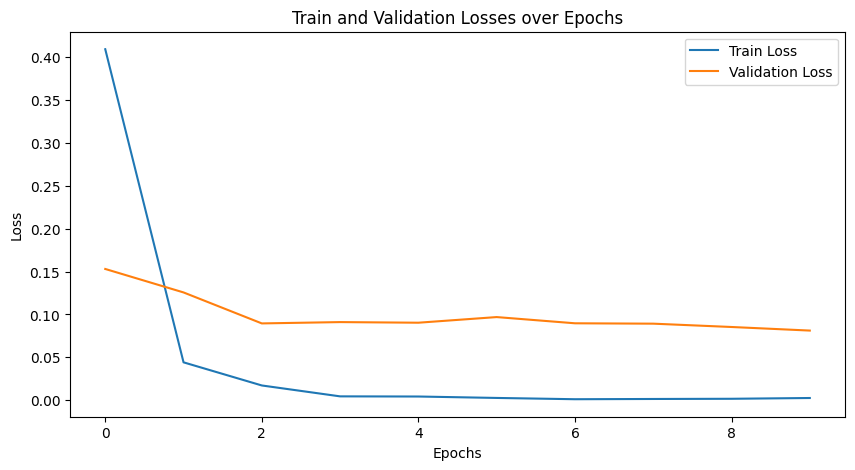

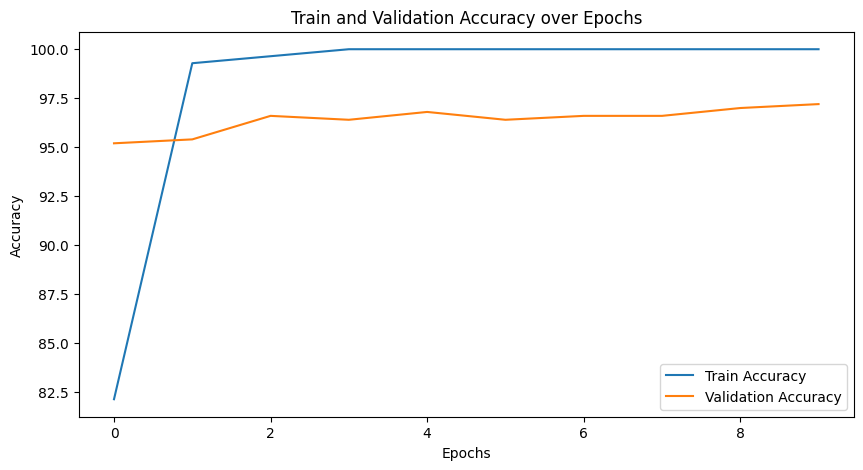

In [ ]:
# Plotting the training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Train and Validation Losses over Epochs')
plt.show()

# Plotting the training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(train_accs, label='Train Accuracy')
plt.plot(val_accs, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Train and Validation Accuracy over Epochs')
plt.show()

### Testing

Accuracy in test: 97.2000%


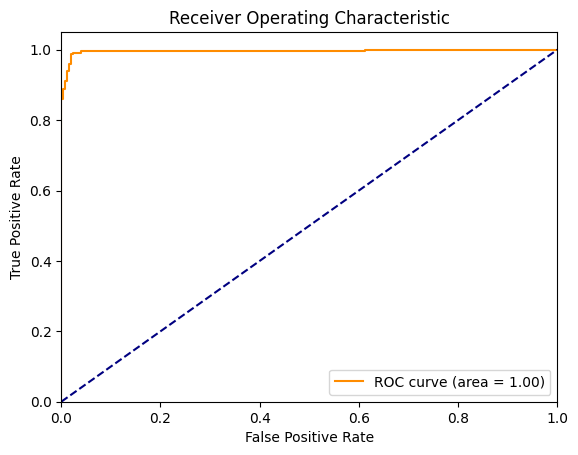

<Figure size 640x480 with 0 Axes>

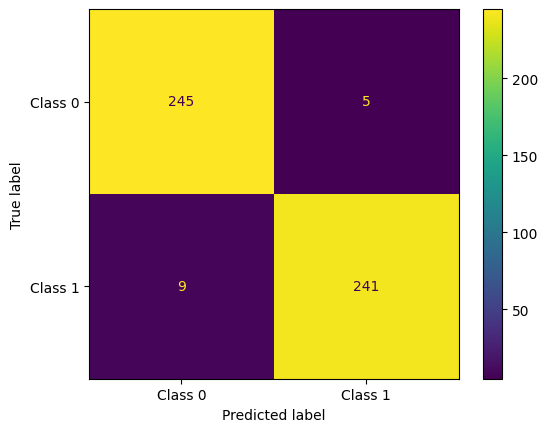

Precision: 0.98
Recall: 0.96
F1 score: 0.97


In [ ]:
model.eval()

with torch.no_grad():
    running_corrects = 0
    # To store all the labels and their corresponding probabilities
    all_labels = []
    all_prob = []

    for input, (label, _) in test_dataloader:
        input, label = input.to(device), label.to(device)

        output = model(input)
        _, preds = torch.max(output, 1)
        # Store the labels and probabilities
        all_labels.extend(label.data.cpu().numpy())
        all_prob.extend(torch.nn.functional.softmax(output, dim=1)[:, 1].cpu().numpy())

        running_corrects += torch.sum(preds == label.data)

    acc = running_corrects / len(test_dataset) * 100.
    print('Accuracy in test: {:.4f}%'.format(acc))

    # Calculate the ROC curve and AUC score
    fpr, tpr, thresholds = roc_curve(all_labels, all_prob)
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

    # Compute confusion matrix
    cnf_matrix = confusion_matrix(all_labels, np.array(all_prob) > 0.5)
    np.set_printoptions(precision=2)

    # Plot non-normalized confusion matrix
    plt.figure()
    cm_display = ConfusionMatrixDisplay(cnf_matrix, display_labels=['Class 0', 'Class 1']).plot()
    plt.show()

    # Other metrics
    precision = precision_score(all_labels, np.array(all_prob) > 0.5)
    recall = recall_score(all_labels, np.array(all_prob) > 0.5)
    f1 = f1_score(all_labels, np.array(all_prob) > 0.5)

    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1 score: {f1:.2f}')
